In [58]:
'''
IMPORTS 
'''

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import pandas as pd
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s
import os
import pywt
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV

from keras.utils import to_categorical
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC


'''
imports
'''

import pandas as pd
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import os
import cmath
import os
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [7]:
### creating the data base ... 1. Phase part

#### making a 300*90 matrix !!!

def replace_ij(df):
    for tits in df.columns:
        if(tits != 'File'):
        
            if df[tits].dtypes =='O':
                df[tits] = df[tits].str.replace('i','j')
                df[tits] = df[tits].str.replace(' ','')
                df[tits] = df[tits].apply(lambda x: np.complex(x))
                
    return df



'''
This downsamples the csv file content with dsr: DOWN SAMPLING RATIO.
'''
def create_downsample(dsr,samples,csv):
    
    df = pd.read_csv(csv)
    print(df.head())
    df = replace_ij(df)
    length =  df.shape[1] ## 30 subcarriers
    #print(df.head)
    
    total = []
    
    temp = np.zeros((30000,length))
    temp = np.array(df[:samples])
    
    trans = np.transpose(temp)
    
    down_sampled = np.zeros((length,int(samples/dsr)),dtype = float)
      
    for row in range(0,dsr):
        down_sampled = trans[:,row::dsr]
        total.append(down_sampled)
    #print("The shape of desampled list :",np.shape(total))
    #total = np.asarray(total)
    return total
   
    

##########################################################
'''
 below code is for returning the list of col_names [b_1.....b_30]
'''

'''
This converts the (16,30,1875) to (172,30,300), default = 16
WITH AN OVERLAPPING WINDOW OF 50%
'''

def part_time_slice(arr,size = 300,overlap_per = 50):

    start = int(0)
    stop = int(start+size)
    temp = arr
    list1 = []
    while(stop <= arr.shape[1]):## arr.shape[1] == 1875. 
        datapoint = np.zeros((30,size))
        datapoint = np.array(temp[:,start:stop])
        #print("This is datapoint")
        #print(np.shape(datapoint))
        list1.append(datapoint)
        start =int( start+((100-overlap_per)*0.01*size))
        stop = int(start  +size)
    return list1 
'''
Joins every small part to the whole
'''

def total_time_parse(sliced_list,dsr = 16):
    time_parse_list = []
    for itr in range(dsr):
        temp = (sliced_list[itr])
        #print("The shape of temp is ", np.shape(temp))
        list_son = part_time_slice(temp)
        
        #print("The dimension of list_son is :", np.shape(list_son))
        
        time_parse_list.extend(list_son)
        
    return time_parse_list


# returns phase of a complex number
def phase(x):
    x = cmath.phase(x)
    return x
#covariance of the array
def covariance(array):
    array = (array - array.mean(axis = 0))/array.std(axis = 0)
    cov =np.cov(array.T)
    return cov

def eigen_decomposition(array):
    eig_values, eig_vectors = np.linalg.eig(array)
    eig_values = sorted(eig_values,reverse = True)
    return eig_values

def extract_features(array):
    a = array[0]
    b = array[1]
    return a,b

cols = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
def heat_map(array):
    plt.figure(figsize=(20,20))
    sns.set(font_scale=1.5)
    hm = sns.heatmap(array,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 12},yticklabels=cols,xticklabels=cols)
    plt.tight_layout()
    plt.show()

#Returns n features
def get_features(array,n):
    phase_cov1 = covariance(array)
    phase_eig1 = eigen_decomposition(phase_cov1)
    features = phase_eig1[0:n]
    return features


#gets the phase difference arrays from 300*90
#The arrays returned should be passed into get_features to get features
def get_pd(array):
    array = array.applymap(phase)
    df1_a = array[['a_1','a_2','a_3','a_4','a_5','a_6','a_7','a_8','a_9','a_10','a_11','a_12','a_13','a_14','a_15','a_16','a_17','a_18','a_19','a_20','a_21','a_22','a_23','a_24','a_25','a_26','a_27','a_28','a_29','a_30']]
    df1_b = array[['b_1','b_2','b_3','b_4','b_5','b_6','b_7','b_8','b_9','b_10','b_11','b_12','b_13','b_14','b_15','b_16','b_17','b_18','b_19','b_20','b_21','b_22','b_23','b_24','b_25','b_26','b_27','b_28','b_29','b_30']]
    df1_c = array[['c_1','c_2','c_3','c_4','c_5','c_6','c_7','c_8','c_9','c_10','c_11','c_12','c_13','c_14','c_15','c_16','c_17','c_18','c_19','c_20','c_21','c_22','c_23','c_24','c_25','c_26','c_27','c_28','c_29','c_30']]
    df1_a.columns = [['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']]
    df1_b.columns = [['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']]
    df1_c.columns = [['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']]
    ba_sub = df1_b.subtract(df1_a)
    cb_sub = df1_c.subtract(df1_b)
    ac_sub = df1_a.subtract(df1_c)
    return ba_sub,cb_sub,ac_sub

def fina_def(array,n):
    ba,cb,ac = get_pd(array)
    ba_eig = get_features(ba,n)
    cb_eig = get_features(cb,n)
    ac_eig = get_features(ac,n)
    eig = []
    eig.extend(ba_eig)
    eig.extend(cb_eig)
    eig.extend(ac_eig)
    return eig

'''
df = pd.DataFrame(tempo.T)
if (len(df.columns) == 90):
    df.columns = ['a_1','b_1','c_1','a_2','b_2','c_2','a_3','b_3','c_3','a_4','b_4','c_4','a_5','b_5','c_5','a_6','b_6','c_6','a_7','b_7','c_7','a_8','b_8','c_8','a_9','b_9','c_9','a_10','b_10','c_10','a_11','b_11','c_11','a_12','b_12','c_12','a_13','b_13','c_13','a_14','b_14','c_14','a_15','b_15','c_15','a_16','b_16','c_16','a_17','b_17','c_17','a_18','b_18','c_18','a_19','b_19','c_19','a_20','b_20','c_20','a_21','b_21','c_21','a_22','b_22','c_22','a_23','b_23','c_23','a_24','b_24','c_24','a_25','b_25','c_25','a_26','b_26','c_26','a_27','b_27','c_27','a_28','b_28','c_28','a_29','b_29','c_29','a_30','b_30','c_30']
            
            
eig = fina_def(df,2)
print(eig)
'''



def feature_produce(chunk):
    df = pd.DataFrame(chunk.T)
    if (len(df.columns) == 90):
        df.columns = ['a_1','b_1','c_1','a_2','b_2','c_2','a_3','b_3','c_3','a_4','b_4','c_4','a_5','b_5','c_5','a_6','b_6','c_6','a_7','b_7','c_7','a_8','b_8','c_8','a_9','b_9','c_9','a_10','b_10','c_10','a_11','b_11','c_11','a_12','b_12','c_12','a_13','b_13','c_13','a_14','b_14','c_14','a_15','b_15','c_15','a_16','b_16','c_16','a_17','b_17','c_17','a_18','b_18','c_18','a_19','b_19','c_19','a_20','b_20','c_20','a_21','b_21','c_21','a_22','b_22','c_22','a_23','b_23','c_23','a_24','b_24','c_24','a_25','b_25','c_25','a_26','b_26','c_26','a_27','b_27','c_27','a_28','b_28','c_28','a_29','b_29','c_29','a_30','b_30','c_30']
    eig = fina_def(df,2) 
    return eig





def create_dad(csv,target,title,dsr= 16 ,samples = 30000):
    dad = pd.DataFrame()
    sliced_list = create_downsample(dsr,samples,csv)
    time_parse_list = total_time_parse(sliced_list) ## This time parse list is for each 
    print("The shape after time parsing : ",np.shape(time_parse_list))
    
    son = np.array(time_parse_list)
    filename = title
    content_csv = []
    for itr in range(son.shape[0]):
        row = []
        title = filename + "(" + str(itr) + ")"
        feat = np.round(feature_produce(son[itr]),decimals = 3)
        row.append(title)
        row.extend(feat)
        row.append(target)
        content_csv.append(row)
    dad =dad.append(content_csv)
    #print(dad.head) 
    return dad


def create_godfather(dataframe,target):
    if(target == 0):
        GF = dataframe
        directory = '/home/surya/Desktop/wifi_sensing/final/multi_class_classification/raw_data/noact'
        z = directory + "/"
    elif(target == 1):
        GF = dataframe
        directory = '/home/surya/Desktop/wifi_sensing/final/multi_class_classification/raw_data/hall'
        z = directory + "/"
        
    elif(target == 2):
        GF = dataframe
        directory = '/home/surya/Desktop/wifi_sensing/final/multi_class_classification/raw_data/br2'
        z = directory + "/"
        
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            a = z + filename
# <><><><><><><><><><><><><><><><><><><><><><><><><><>

#This is for deciding the title


        if(target == 0):
            sstring1 = '/home/surya/Desktop/wifi_sensing/final/multi_class_classification/raw_data/noact'
            res = a.replace(sstring1, 'no_act') 
        elif(target == 1):
            sstring1 = '/home/surya/Desktop/wifi_sensing/final/multi_class_classification/raw_data/hall'
            res = a.replace(sstring1, 'hall') 
        
        elif(target == 2):
            sstring1 = '/home/surya/Desktop/wifi_sensing/final/multi_class_classification/raw_data/br2'
            res = a.replace(sstring1, 'br2') 
            
        sstring2 = '.csv'
        title = res.replace(sstring2, '') 
            
        print('Under Progress',title)
        content_one_csv = create_dad(a,target,title)
        GF = GF.append(content_one_csv)
        
#<><><><><><><><><><><><><><><><><><><><><><><><><><>
    return GF


In [8]:
### Creation of feature sett

GF = pd.DataFrame()
GF = create_godfather(GF,0)
GF = create_godfather(GF,1)
GF = create_godfather(GF,2)
print(GF.head())
print(len(GF.columns))
if (len(GF.columns) == 8):
    GF.columns = ['title','BA_1','BA_2','CB_1','CB_2','AC_1','AC_2','Y']
GF.to_csv("Phase_multiclass_room.csv",index=False)
print('CSV_created!!!')

Under Progress no_act/19A_noactivity_7
      a_1     b_1    c_1     a_2      b_2     c_2     a_3     b_3     c_3  \
0  -11-4i    8+2i   5+2i  -13+8i    11-6i    6-3i  -4+17i   0-11i    4-6i   
1      -4   1-15i  4-11i    0+5i   -9-17i  -5-16i    5+6i     -20  -18-2i   
2   -1+4i  -14-5i  -9-7i    7+2i  -16+11i  -18+9i    2-4i   2+19i  -4+21i   
3   -1-4i   12-1i  11+3i   -4-3i    9-13i   13-9i    0+7i  -6-22i  -4-17i   
4   -1-3i   3+16i  4+11i   -1-6i    18+6i   14+5i   -6-2i  18-13i   18-8i   

      a_4  ...    c_27     a_28     b_28     c_28     a_29     b_29    c_29  \
0  12+13i  ...   8+10i  -26+40i   12-11i    11+2i   10+39i   -2-16i    8-7i   
1    6-2i  ...  24-10i   44+38i  -10-28i    5-24i    52-8i  -21-10i  -9-13i   
2   -5-6i  ...  -23-5i  -18-57i  -11+28i  -17+16i  -47-23i   12+16i  -2+17i   
3    7+1i  ...  15-19i   58+16i  -21-16i   -5-25i   36-29i   -21+3i  -15-7i   
4   -1+4i  ...  -9+24i   -59-2i   27+14i   13+19i  -31+41i   22-10i   19+2i   

      a_30     b_30    

The shape after time parsing :  (176, 90, 300)
Under Progress no_act/19A_noactivity_6
       a_1    b_1    c_1      a_2     b_2    c_2      a_3     b_3    c_3  \
0    4+20i  27+9i  -6-1i   21+17i  28-19i   3+5i    28-7i  10-35i  -2+7i   
1  -24-27i   0+6i  -4+1i   -48-7i    4+5i  -4+6i  -43+27i    7+4i   3+6i   
2  -17-29i  -1+4i  -2+2i  -41-12i    2+9i  -4+7i  -40+19i    7+4i   1+4i   
3   32+13i   0-6i   2-7i   47-12i   -8-7i  -1-6i   29-39i   -5-2i  -8-6i   
4  -24+27i   6-1i   1+2i   -4+46i    9-4i   7+2i   31+40i    2-6i   5-4i   

       a_4  ...   c_27    a_28     b_28   c_28   a_29    b_29   c_29    a_30  \
0   20-15i  ...   5-8i  22-15i  -10+28i  -5-6i  4-25i   8+22i    -11  -6-20i   
1  -21+43i  ...   3+6i   -1+7i     5+7i   5+2i   3+4i    7+7i   4+1i    5+2i   
2  -21+40i  ...   4-1i    8+5i     6+3i   6-4i   6-2i    4-3i   1-3i    3-6i   
3    4-48i  ...  -4-4i   -5-8i    -7-9i  -6-2i     -5   -9-1i  -3+3i   -4-2i   
4   48+15i  ...  -1-3i    5-9i     3-7i  -2-7i  -5-8i  -2

The shape after time parsing :  (176, 90, 300)
Under Progress hall/18A_walk_hall_c1c2_1
      a_1      b_1    c_1      a_2      b_2   c_2      a_3      b_3    c_3  \
0  -2-19i    17-6i  -1-2i  -24-13i    8-24i    -3  -24+10i  -12-21i     -1   
1  -7-17i   14-10i  -1+2i  -21-10i    8-22i  0-1i  -21+15i  -14-19i  -1+2i   
2  -16-5i    0-19i   0+1i  -19+13i  -17-17i    -1    2+28i   -23+7i      1   
3  -17-2i   -2-18i   0-1i  -17+14i  -18-17i    -2    4+25i   -25+5i   0+2i   
4  -16+6i  -10-15i  -2-1i   -9+23i   -21-5i  2+4i   15+22i  -19+20i  -2+2i   

      a_4  ...   c_27     a_28     b_28   c_28     a_29     b_29   c_29  \
0  -7+27i  ...  -3-3i   -34-7i    7-24i  -4+4i  -23+19i  -13-16i  -2+1i   
1  -2+28i  ...  -2+3i  -20+29i  -19-17i  -3+3i    8+27i   -20+4i   4+3i   
2  24+17i  ...   3+3i   33+10i  -10+21i   2-1i   25-16i   13+17i   5-4i   
3  20+17i  ...  -4+2i  -10+33i   -24-8i   1+2i   17+23i  -17+11i   2+1i   
4   32+4i  ...   4+3i   32+15i  -13+22i   6-2i   27-15i    8+18i   1

The shape after time parsing :  (176, 90, 300)
Under Progress br2/18A_walk_br2_a1b1_1
       a_1      b_1    c_1     a_2      b_2    c_2      a_3     b_3    c_3  \
0   -15-8i    4-18i   1+2i  -22+8i  -13-18i  -1+1i   -8+27i  -25-2i  -1+3i   
1  -10+15i   -15-4i      0   8+24i  -16+13i   0+3i    28+5i   2+22i   4-1i   
2    15-8i   11+10i   1-3i   7-25i    19-2i   0-1i  -19-20i   9-19i  -4+1i   
3   13+12i   -6+15i   1+2i   21-4i   12+17i      6    8-25i   22+2i  -2-2i   
4  -13+11i  -13-10i  -3+2i   0+21i   -18+6i   0+3i   24+16i  -7+22i   4-1i   

       a_4  ...   c_27     a_28    b_28   c_28     a_29     b_29   c_29  \
0   15+24i  ...  -1+3i  -12+33i  -23-7i  -1+4i   13+26i  -18+10i   3+3i   
1   21-17i  ...   5-1i   27-23i  11+11i  -1-4i   -4-31i    16-3i     -4   
2      -30  ...  -3-5i   -9-35i   18-7i  -6-3i  -25-14i    8-15i     -3   
3  -12-23i  ...   2-4i    3-34i      19  -3-3i  -20-22i   12-14i     -2   
4   27-11i  ...   5+1i   29-16i   9+17i   2-6i    6-31i    17+4i  -2-6

In [ ]:
######################### creating the magnitude dataset..

In [11]:
'''
This downsamples the csv file content with dsr: DOWN SAMPLING RATIO.
'''
def create_downsample(dsr,samples,csv,col_name):
    
    df = pd.read_csv(csv,usecols=col_name)
    length =  df.shape[1] ## 30 subcarriers
    total = []
    
    temp = np.zeros((30000,length))
    temp = np.array(df[:samples])
    
    trans = np.transpose(temp)
    
    down_sampled = np.zeros((length,int(samples/dsr)),dtype = float)
      
    for row in range(0,dsr):
        down_sampled = trans[:,row::dsr]
        total.append(down_sampled)
    #print("The shape of desampled list :",np.shape(total))
    return total
   
##########################################################
'''
 below code is for returning the list of col_names [b_1.....b_30]
'''

names =[]
for i in range(1,31):
    temp = str("b_" + str(i))
    names.append(temp)
#print(names)



'''
This converts the (16,30,1875) to (172,30,300), default = 16
WITH AN OVERLAPPING WINDOW OF 50%
'''
def part_time_slice(arr,size = 300,overlap_per = 50):

    start = int(0)
    stop = int(start+size)
    temp = arr
    list1 = []
    while(stop <= arr.shape[1]):## arr.shape[1] == 1875. 
        datapoint = np.zeros((30,size))
        datapoint = np.array(temp[:,start:stop],dtype=float)
        #print("This is datapoint")
        #print(np.shape(datapoint))
        list1.append(datapoint)
        start =int( start+((100-overlap_per)*0.01*size))
        stop = int(start  +size)
    return list1 
'''
Joins every small part to the whole
'''

def total_time_parse(sliced_list,dsr = 16):
    time_parse_list = []
    for itr in range(dsr):
        temp = (sliced_list[itr])
        #print("The shape of temp is ", np.shape(temp))
        list_son = part_time_slice(temp)
        
        #print("The dimension of list_son is :", np.shape(list_son))
        
        time_parse_list.extend(list_son)
        
    return time_parse_list

'''
Performs wavelet denoising !!!
'''
def denoise(signal, thresh ,title = None, wavelet="db5"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return  np.round(reconstructed_signal,decimals = 2)

def preprocess(datapoint,thresh = 0.35):
    dummy = np.zeros(datapoint.shape)
    for car in range(30):
        dummy[car,:] = denoise(datapoint[car,:],thresh) 
    return dummy
'''
This is to find out the features for every chunk i.e 300*30 matrix.
'''

cols = ['b_1','b_2','b_3','b_4','b_5','b_6','b_7','b_8','b_9','b_10','b_11','b_12','b_13','b_14','b_15','b_16','b_17','b_18','b_19','b_20','b_21','b_22','b_23','b_24','b_25','b_26','b_27','b_28','b_29','b_30']
def heat_map(array):
    plt.figure(figsize=(20,20))
    sns.set(font_scale=1.5)
    hm = sns.heatmap(array,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 12},yticklabels=cols,xticklabels=cols)
    plt.tight_layout()
    plt.show()

def normalixing_matrix(arr): ## array should be 300*30
    normed =(arr - arr.mean(axis=0)) / arr.std(axis=0)
    #print("The shape of normed is", normed.shape)
    cov = np.cov(normed.T)
    return normed,cov

def eigendecomposition(array,k):
    eig_values, eig_vectors = np.linalg.eig(array)
    idx = np.argsort(eig_values, axis=0)[::-1]
    sorted_eig_vectors = eig_vectors[:, idx]
    cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
    xint = range(1, len(cumsum) + 1)
    '''
    plt.figure(figsize = (10,10))
    plt.plot(xint, cumsum)
    plt.xlabel("Number of components")
    plt.ylabel("Cumulative explained variance")
    plt.xticks(xint)
    plt.xlim(1, 30, 1)
    '''
    req_eig_vectors = sorted_eig_vectors[:, 0:k]
    return req_eig_vectors

def diff(array):
    sum = 0
    for i in range(1,len(array)):
        sum = sum + abs(array[i] - array[i-1])
    sum = sum / len(array)-1
    return sum

def extractfeatures(array):
    lis = np.zeros(array.shape[1])
    for i in range(array.shape[1]):
        temp = array[:,i]
        lis[i] = diff(temp)
    return lis
        

'''
This is the summary of all codes above !!
'''




def feature_produce(chunk):# chunk shoould be 30*300
    trans = chunk.T
    normed,cov = normalixing_matrix(trans)
    req_eig_vectors = eigendecomposition(cov,5)
    features= extractfeatures(req_eig_vectors)
    return features


def create_dad(csv,target,title,dsr= 16 ,samples = 30000):
    dad = pd.DataFrame()
    sliced_list = create_downsample(dsr,samples,csv,names)
    time_parse_list = total_time_parse(sliced_list) ## This time parse list is for each 
    print("The shape after time parsing : ",np.shape(time_parse_list))
    
    son = np.array(time_parse_list)
    filename = title
    content_csv = []
    for itr in range(son.shape[0]):
        row = []
        title = filename + "(" + str(itr) + ")"
        feat = np.round(feature_produce(son[itr]),decimals = 3)
        row.append(title)
        row.extend(feat)
        row.append(target)
        content_csv.append(row)
    dad =dad.append(content_csv)
    #print(dad.head)
        
        
    return dad


def create_godfather(dataframe,target):
    if(target == 0):
        GF = dataframe
        directory = '/home/surya/Desktop/wifi_sensing/final/multi_class_classification/mag_data/noact'
        z = directory + "/"
    elif(target == 1):
        GF = dataframe
        directory = '/home/surya/Desktop/wifi_sensing/final/multi_class_classification/mag_data/hall'
        z = directory + "/"
        
    elif(target == 2):
        GF = dataframe
        directory = '/home/surya/Desktop/wifi_sensing/final/multi_class_classification/mag_data/br2'
        z = directory + "/"
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            a = z + filename
# <><><><><><><><><><><><><><><><><><><><><><><><><><>

#This is for deciding the title



        if(target == 0):
            sstring1 = '/home/surya/Desktop/wifi_sensing/final/multi_class_classification/mag_data/noact'
            res = a.replace(sstring1, 'no_act') 
        elif(target == 1):
            sstring1 = '/home/surya/Desktop/wifi_sensing/final/multi_class_classification/mag_data/hall'
            res = a.replace(sstring1, 'hall') 
        
        elif(target == 2):
            sstring1 = '/home/surya/Desktop/wifi_sensing/final/multi_class_classification/mag_data/br2'
            res = a.replace(sstring1, 'br2') 
            

        sstring2 = '.csv'
        title = res.replace(sstring2, '') 
            
        print('Under Progress',title)
        content_one_csv = create_dad(a,target,title)
        GF = GF.append(content_one_csv)
        
#<><><><><><><><><><><><><><><><><><><><><><><><><><>
    return GF


In [12]:
### Creation of mag dataset

GF = pd.DataFrame()
GF = create_godfather(GF,0)
GF = create_godfather(GF,1)
GF = create_godfather(GF,2)
print(GF.head())
print(len(GF.columns))
if (len(GF.columns) == 7):
    GF.columns = ['title','A_1','A_2','A_3','A_4','A_5','Y']
GF.to_csv("mag_multiclass_room.csv",index=False)

Under Progress no_act/19A_noactivity_7
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/19A_noactivity_3
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/13A_noactivity_2
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/19A_noactivity_1
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/19A_noactivity_4
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/19A_noactivity_5
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/13A_noactivity_1
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/19A_noactivity_6
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/19A_noactivity_2
The shape after time parsing :  (176, 30, 300)
Under Progress hall/18A_walk_hall_a1d1_1
The shape after time parsing :  (176, 30, 300)
Under Progress hall/18A_walk_hall_b1b2_1
The shape after time parsing :  (176, 30, 300)
Under Progress hall/13A_walk_hall_2
The shape afte

In [13]:
### USING BOTH MAGNITUDES AND PHASE !!!

data1 = pd.read_csv('mag_multiclass_room.csv')

data101 = pd.DataFrame(data1,columns = ['title','A_1','A_2','A_3','A_4','A_5'])
print(data101.head())

data2 = pd.read_csv('Phase_multiclass_room.csv')
data102 = pd.DataFrame(data2,columns  = ['BA_1','BA_2','CB_1','CB_2','AC_1','AC_2','Y'])
print(data102.head())


data3 = pd.concat([data101,data102],axis = 1)
print(data3.head())
data3.to_csv("multi_dataset.csv")

                        title    A_1    A_2    A_3    A_4    A_5
0  no_act/19A_noactivity_7(0) -0.982 -0.818 -0.758 -0.768 -0.774
1  no_act/19A_noactivity_7(1) -0.981 -0.823 -0.773 -0.806 -0.803
2  no_act/19A_noactivity_7(2) -0.984 -0.836 -0.803 -0.789 -0.774
3  no_act/19A_noactivity_7(3) -0.988 -0.816 -0.802 -0.810 -0.817
4  no_act/19A_noactivity_7(4) -0.987 -0.815 -0.814 -0.772 -0.809
     BA_1   BA_2   CB_1   CB_2    AC_1   AC_2  Y
0  10.654  9.920  2.211  2.061  10.211  9.284  0
1  10.491  9.679  2.146  2.108   9.996  9.023  0
2  11.017  9.082  2.281  2.089  10.488  8.545  0
3  10.353  9.709  2.427  2.146  10.065  9.007  0
4  10.704  9.598  2.361  2.217  10.143  9.033  0
                        title    A_1    A_2    A_3    A_4    A_5    BA_1  \
0  no_act/19A_noactivity_7(0) -0.982 -0.818 -0.758 -0.768 -0.774  10.654   
1  no_act/19A_noactivity_7(1) -0.981 -0.823 -0.773 -0.806 -0.803  10.491   
2  no_act/19A_noactivity_7(2) -0.984 -0.836 -0.803 -0.789 -0.774  11.017   
3  no_act/19

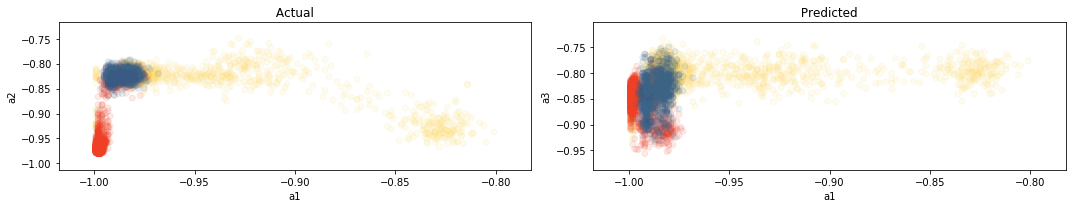

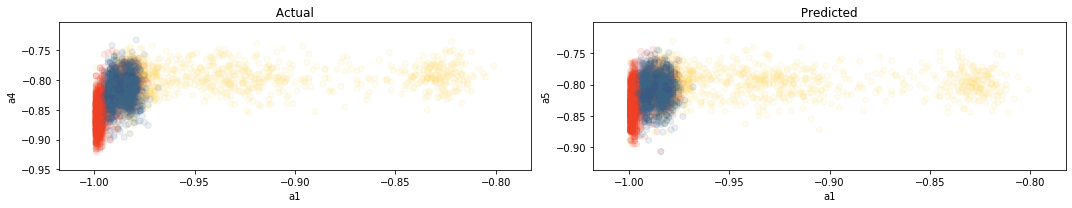

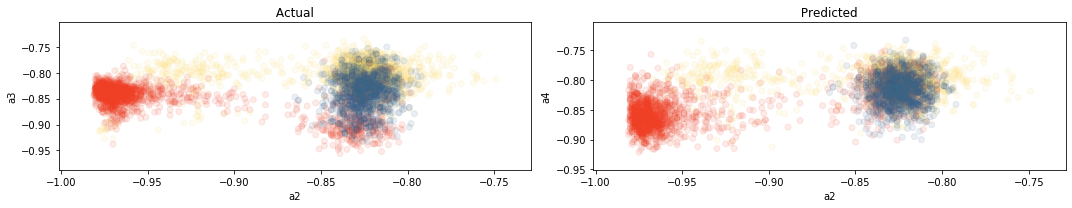

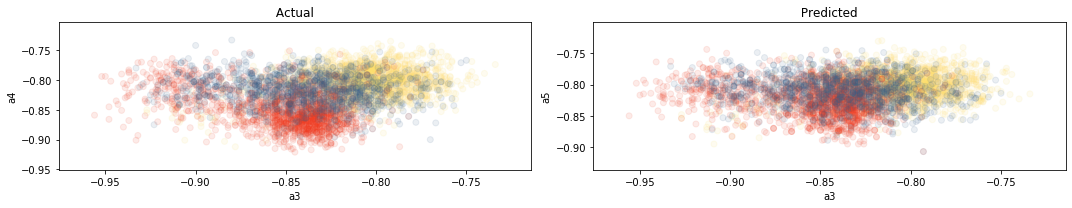

In [83]:
data = pd.read_csv('multi_dataset.csv',index_col = 0)
#print(data.head())
colors = np.array(['#fdde6c','#ef4026','#3b638c']) 


noact = data[data["Y"] == 0]
hall = data[data["Y"] == 1]
br2 = data[data["Y"] == 2]


a1 = data[['A_1']]
a2 = data[['A_2']]

a3 = data[['A_3']]
a4 = data[['A_4']]

a5 = data[['A_5']]
a6 = data[['A_1']]



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a2, alpha=0.1, c=colors[3*(data['Y'])  // 3]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a2')


#axes[0].label('Actual plot')

axes[1].scatter(a1, a3, alpha=0.1, c=colors[3*(data['Y'])  // 3]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a3')
fig.tight_layout()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a4, alpha=0.1, c=colors[3*(data['Y'])  // 3]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a4')


#axes[0].label('Actual plot')

axes[1].scatter(a1, a5, alpha=0.1, c=colors[3*(data['Y'])  // 3]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a5')
fig.tight_layout()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a2,a3, alpha=0.1, c=colors[3*(data['Y'])  // 3]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a2')
axes[0].set_ylabel('a3')


#axes[0].label('Actual plot')

axes[1].scatter(a2, a4, alpha=0.1, c=colors[3*(data['Y'])  // 3]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a2')
axes[1].set_ylabel('a4')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a3,a4, alpha=0.1, c=colors[3*(data['Y'])  // 3]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a3')
axes[0].set_ylabel('a4')


#axes[0].label('Actual plot')

axes[1].scatter(a3, a5, alpha=0.1, c=colors[3*(data['Y'])  // 3]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a3')
axes[1].set_ylabel('a5')
fig.tight_layout()




In [73]:
data = pd.read_csv('multi_dataset.csv',index_col = 0)
print(np.array(data["A_1"]))


[-0.982 -0.981 -0.984 ... -0.979 -0.976 -0.978]


In [86]:
features = ['BA_1','BA_2']

#features  = ['A_2','A_4']


train, test = train_test_split(data, test_size=.25) 
X_train = train[features]
Y_train = train["Y"] 

X_test = test[features]
Y_test = test["Y"] 

params_grid = [{'kernel': ['rbf'], 'gamma': [1e5],
                     'C': [ 1000]},]
      #          {'kernel': ['linear'], 'C': [ 100,1000]}


# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, Y_train)

print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test)
#Y_pred_label = list(encoder.inverse_transform(Y_pred))



# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(Y_test,Y_pred))
print("\n")
print(classification_report(Y_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test , Y_test ))

svm_model.score




Best score for training data: 0.4099501954943213 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 100000.0 

[[385  13   1]
 [317  60  11]
 [241  22  42]]


              precision    recall  f1-score   support

           0       0.41      0.96      0.57       399
           1       0.63      0.15      0.25       388
           2       0.78      0.14      0.23       305

    accuracy                           0.45      1092
   macro avg       0.61      0.42      0.35      1092
weighted avg       0.59      0.45      0.36      1092

Training set score for SVM: 0.990537
Testing  set score for SVM: 0.445971


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1000], 'gamma': [100000.0], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

0 --blue-- > noactivity
1 --orange-> activity
accuracy:  0.7070938215102975
[[198   6 106]
 [ 18 251  54]
 [ 72   0 169]]


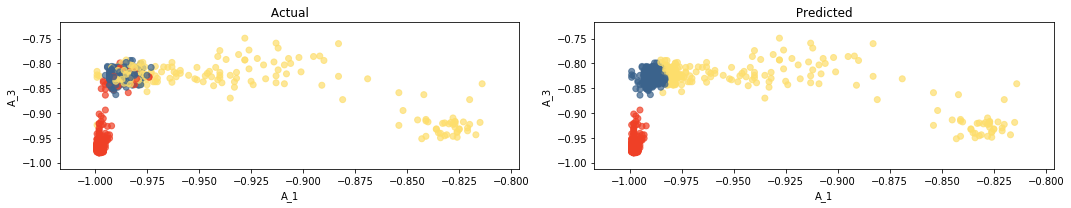

In [95]:
# svm model



########################################################
'''
This is a single prediction !!!
'''

from sklearn.svm import SVC
model = SVC(kernel='rbf',gamma = 1e5)



train, test = train_test_split(data, test_size=.2) 


#train_normal = train[train['Y']==1] 
#train_outliers = train[train['Y']==0] 
#outlier_prop = len(train_outliers) / len(train_normal) 
#model = svm.OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=1000)

model = SVC(kernel='rbf')

feature_list = ['A_1','A_2']

#feature_list = ['A_1','A_3']
#classifier = model.fit(train_normal[feature_list])


classifier = model.fit(train[feature_list], train['Y'])
# <><><><><><><><><><><><><><><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

x1 = test[[feature_list[0]]] 
x2 = test[[feature_list[0]]] 
y1 = test[[feature_list[1]]]
y2 = test[[feature_list[1]]]


y_pred = model.predict(test[feature_list]) 

'''
for i in range(len(y_pred)):
  if (y_pred[i] == -1):
    y_pred[i] = 0
'''




print('0 --blue-- > noactivity')
print('1 --orange-> activity')
colors = np.array(['#fdde6c','#ef4026','#3b638c'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(x1,y1, alpha=0.7, c=colors[3*(test['Y'] ) // 3]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('A_1')
axes[0].set_ylabel('A_3')


#axes[0].label('Actual plot')

axes[1].scatter(x2, y2, alpha=0.7, c=colors[3*(y_pred ) // 3])
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('A_1')
axes[1].set_ylabel('A_3')
fig.tight_layout()

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
from sklearn import metrics

targs = np.array(test[['Y']])
targs = np.reshape(targs,(targs.shape[0],))

preds = y_pred


#print('this is Actual : ',targs)
#print('this is predicted : ',preds)
print("accuracy: ", metrics.accuracy_score(targs, preds))
'''
print("precision: ", metrics.precision_score(targs, preds)) 
print("recall: ", metrics.recall_score(targs, preds))
print("f1: ", metrics.f1_score(targs, preds))
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

'''


cm = confusion_matrix(targs, preds)
print(cm)

In [51]:
'''
The cross validation technique !!!!
'''

### k fold implementation ...
#feature_list = ['A_1','A_2','A_3','A_4','A_5']


feature_list = ['CB_1','CB_2']


#############################################################
## k fold validation implementation !!!

num_folds = 10

# Define per-fold score containers
pre_per_fold = []
acc_per_fold = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
inputs =  np.array(data[feature_list])
targets = np.array(data["Y"])


# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs,targets):
    
    trainX,trainY = inputs[train],targets[train]
    trainY = trainY.reshape(trainX.shape[0],1)
    testX,testY = inputs[test],targets[test]
    testY = testY.reshape(testX.shape[0],1)

    
    set_train = np.concatenate((trainX,trainY),axis=1)
    set_test = np.concatenate((testX,testY),axis=1)

    print('----------------------------------------------------------------------')
    
    print(f'Training for fold {fold_no} ...')
    
    

    

    model = SVC(kernel='rbf')
    classifier = model.fit(trainX,trainY)
    
    
    
    
    
    
    
    y_pred = model.predict(testX) 
    targs = np.array(testY)
    targs = np.reshape(targs,(targs.shape[0],))

    preds = y_pred
    
    for i in range(len(y_pred)):
        if (y_pred[i] == -1):
            y_pred[i] = 0   
            
    #print("accuracy: ", metrics.accuracy_score(targs, preds))
    #print("precision: ", metrics.precision_score(targs, preds)) 
    
    scores = np.array([metrics.accuracy_score(targs, preds),metrics.precision_score(targs, preds)])

    
#####################################################################
#####################################################################
     # Generate a print
    #print(f'Score for fold {fold_no}: acc of {scores[0]}; precision of {scores[1]*100}%')

    pre_per_fold.append(scores[1] * 100)
    acc_per_fold.append(scores[0]*100)
    


  # Increase fold number
    fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Precison: {pre_per_fold[i]} -  Accuracy : {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Precision: {np.mean(pre_per_fold)}(+- {np.std(pre_per_fold)}')
print('------------------------------------------------------------------------')

    
    
    


[[-0.982 -0.818 -0.758 -0.768 -0.774]
 [-0.981 -0.823 -0.773 -0.8059999999999999 -0.8029999999999999]
 [-0.984 -0.836 -0.8029999999999999 -0.789 -0.774]
 ...
 [-0.979 -0.8320000000000001 -0.794 -0.812 -0.784]
 [-0.976 -0.8220000000000001 -0.8290000000000001 -0.8 -0.797]
 [-0.978 -0.821 -0.828 -0.7959999999999999 -0.8009999999999999]]
